# Portfolio assignment 15
**Train a decision tree to predict the species of a "penguin" based on their characteristics:**

Prepare the data, Some machine learning algorithms can not handle missing values. You will either need to:
- replace missing values (with the mean or most popular value). (You can use *.fillna(\<value\>)*)
- remove rows with missing data. (with *.dropna()*)

After:
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins_clean = penguins.dropna()
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [2]:
# Doel: species
# Kenmerken: flipper_length_mm, bill_length_mm, bill_depth_mm, body_mass_g
features = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
X = penguins_clean[features]
y = penguins_clean['species']

In [8]:
# Verdeel(70%), (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {acc_train:.2f}")
print(f"Test Accuracy: {acc_test:.2f}")


Train Accuracy: 0.97
Test Accuracy: 0.98


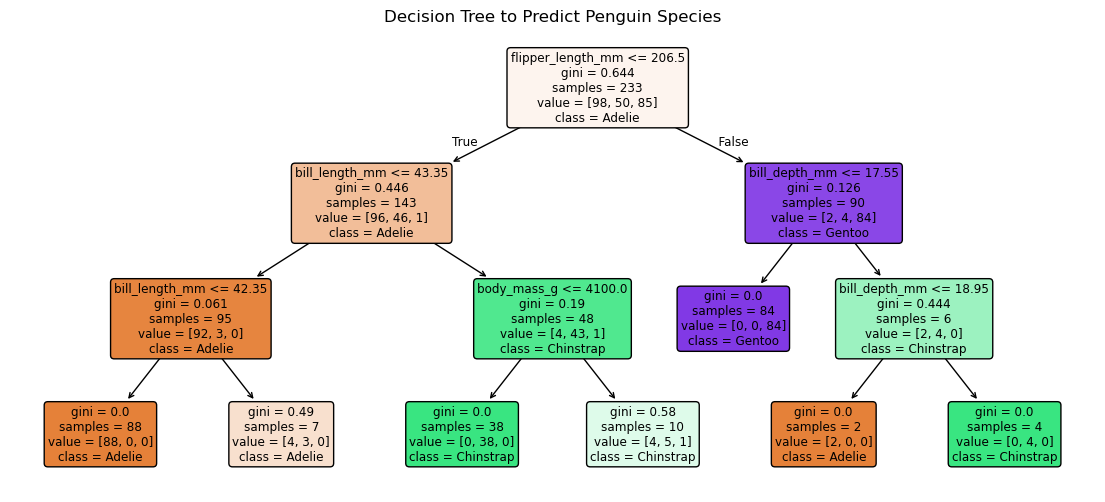

In [7]:
plt.figure(figsize=(14, 6))
tree.plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree to Predict Penguin Species")
plt.show()

### Findings:

- kan soort van penguin goed voorspellen door de accuracy op testset van **97/98%**, dus een **goede fit**.
- De belangrijkste kenmerken voor het onderscheiden van soorten zijn: **flipper length, bill length en body mass.**
- De eerste splitsing in de boom gebeurt vaak op flipper length. dus **flipper length = sterke voorspeller**
- Trainingsset was iets nauwkeuriger dan de testset. dit komt omdat het model de trainigsdata al "kent" (lichte overfitting is normaal).
- Diepte van **3 niveaus**, wat zorgt voor een goed uitlegbaar model met hoge nauwkeurigheid.